In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import sys
sys.path.append('../../../../')
import utils

In [2]:
CALIBRATION_FILE = '../../../../calibration/out/C.mat'
DATA_FILE = '../../../../experiment_data/blue_feet/test_chasis_movement/14/2017.06.05_14.25.24_trial_imudata.txt'

In [3]:
utils.print_header(DATA_FILE)

%  Data file recorded 2017/6/5  14:25:24
%  Stride Frequency         = [1, 1]
%  Lead In /Lead Out        = 
%  Deltas (Fractional)      = [0.25, 0.25, 0.25],[0.25, 0.25, 0.25]
%  Phase                    = 32768
%  Experiment.py 
%  Motor Gains    = [5000, 400, 200, 0, 300, 5000, 400, 200, 0, 300]



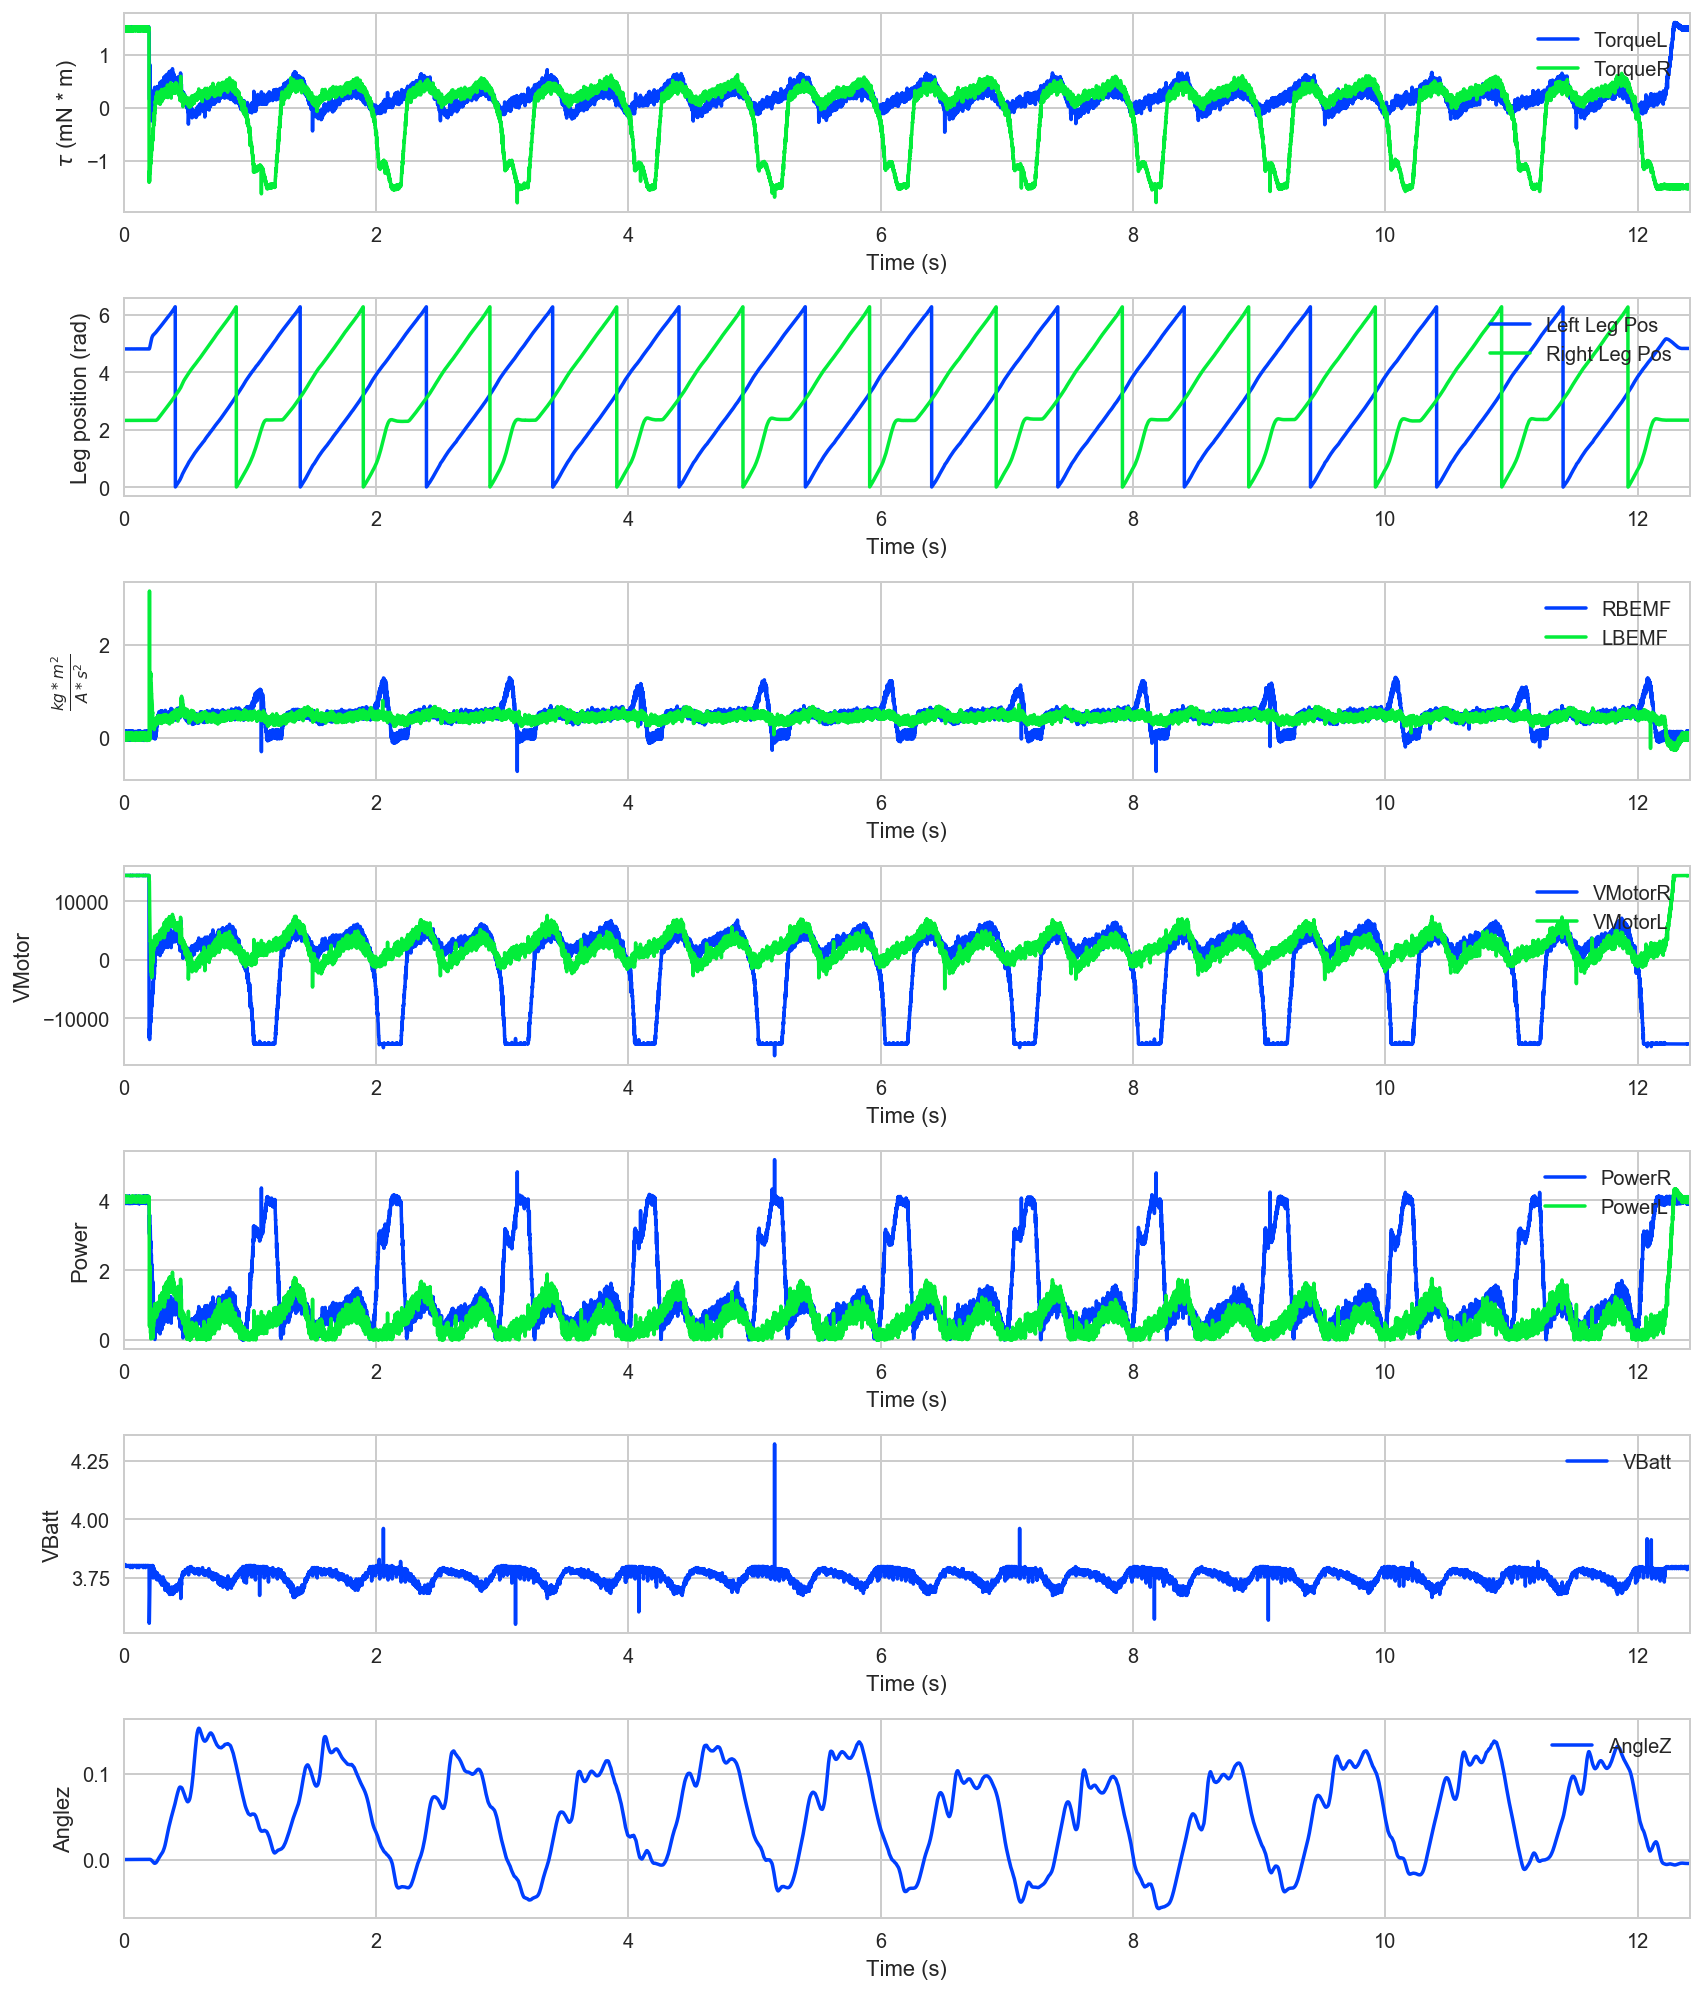

In [4]:
df = utils.process_data_files(DATA_FILE, CALIBRATION_FILE)
utils.plot_columns(df, [['TorqueL', 'TorqueR'], ['Left Leg Pos', 'Right Leg Pos'], ['RBEMF', 'LBEMF'], ['VMotorR', 'VMotorL'], ['PowerR', 'PowerL'], 'VBatt', 'AngleZ'], display=True, save_figure=False)

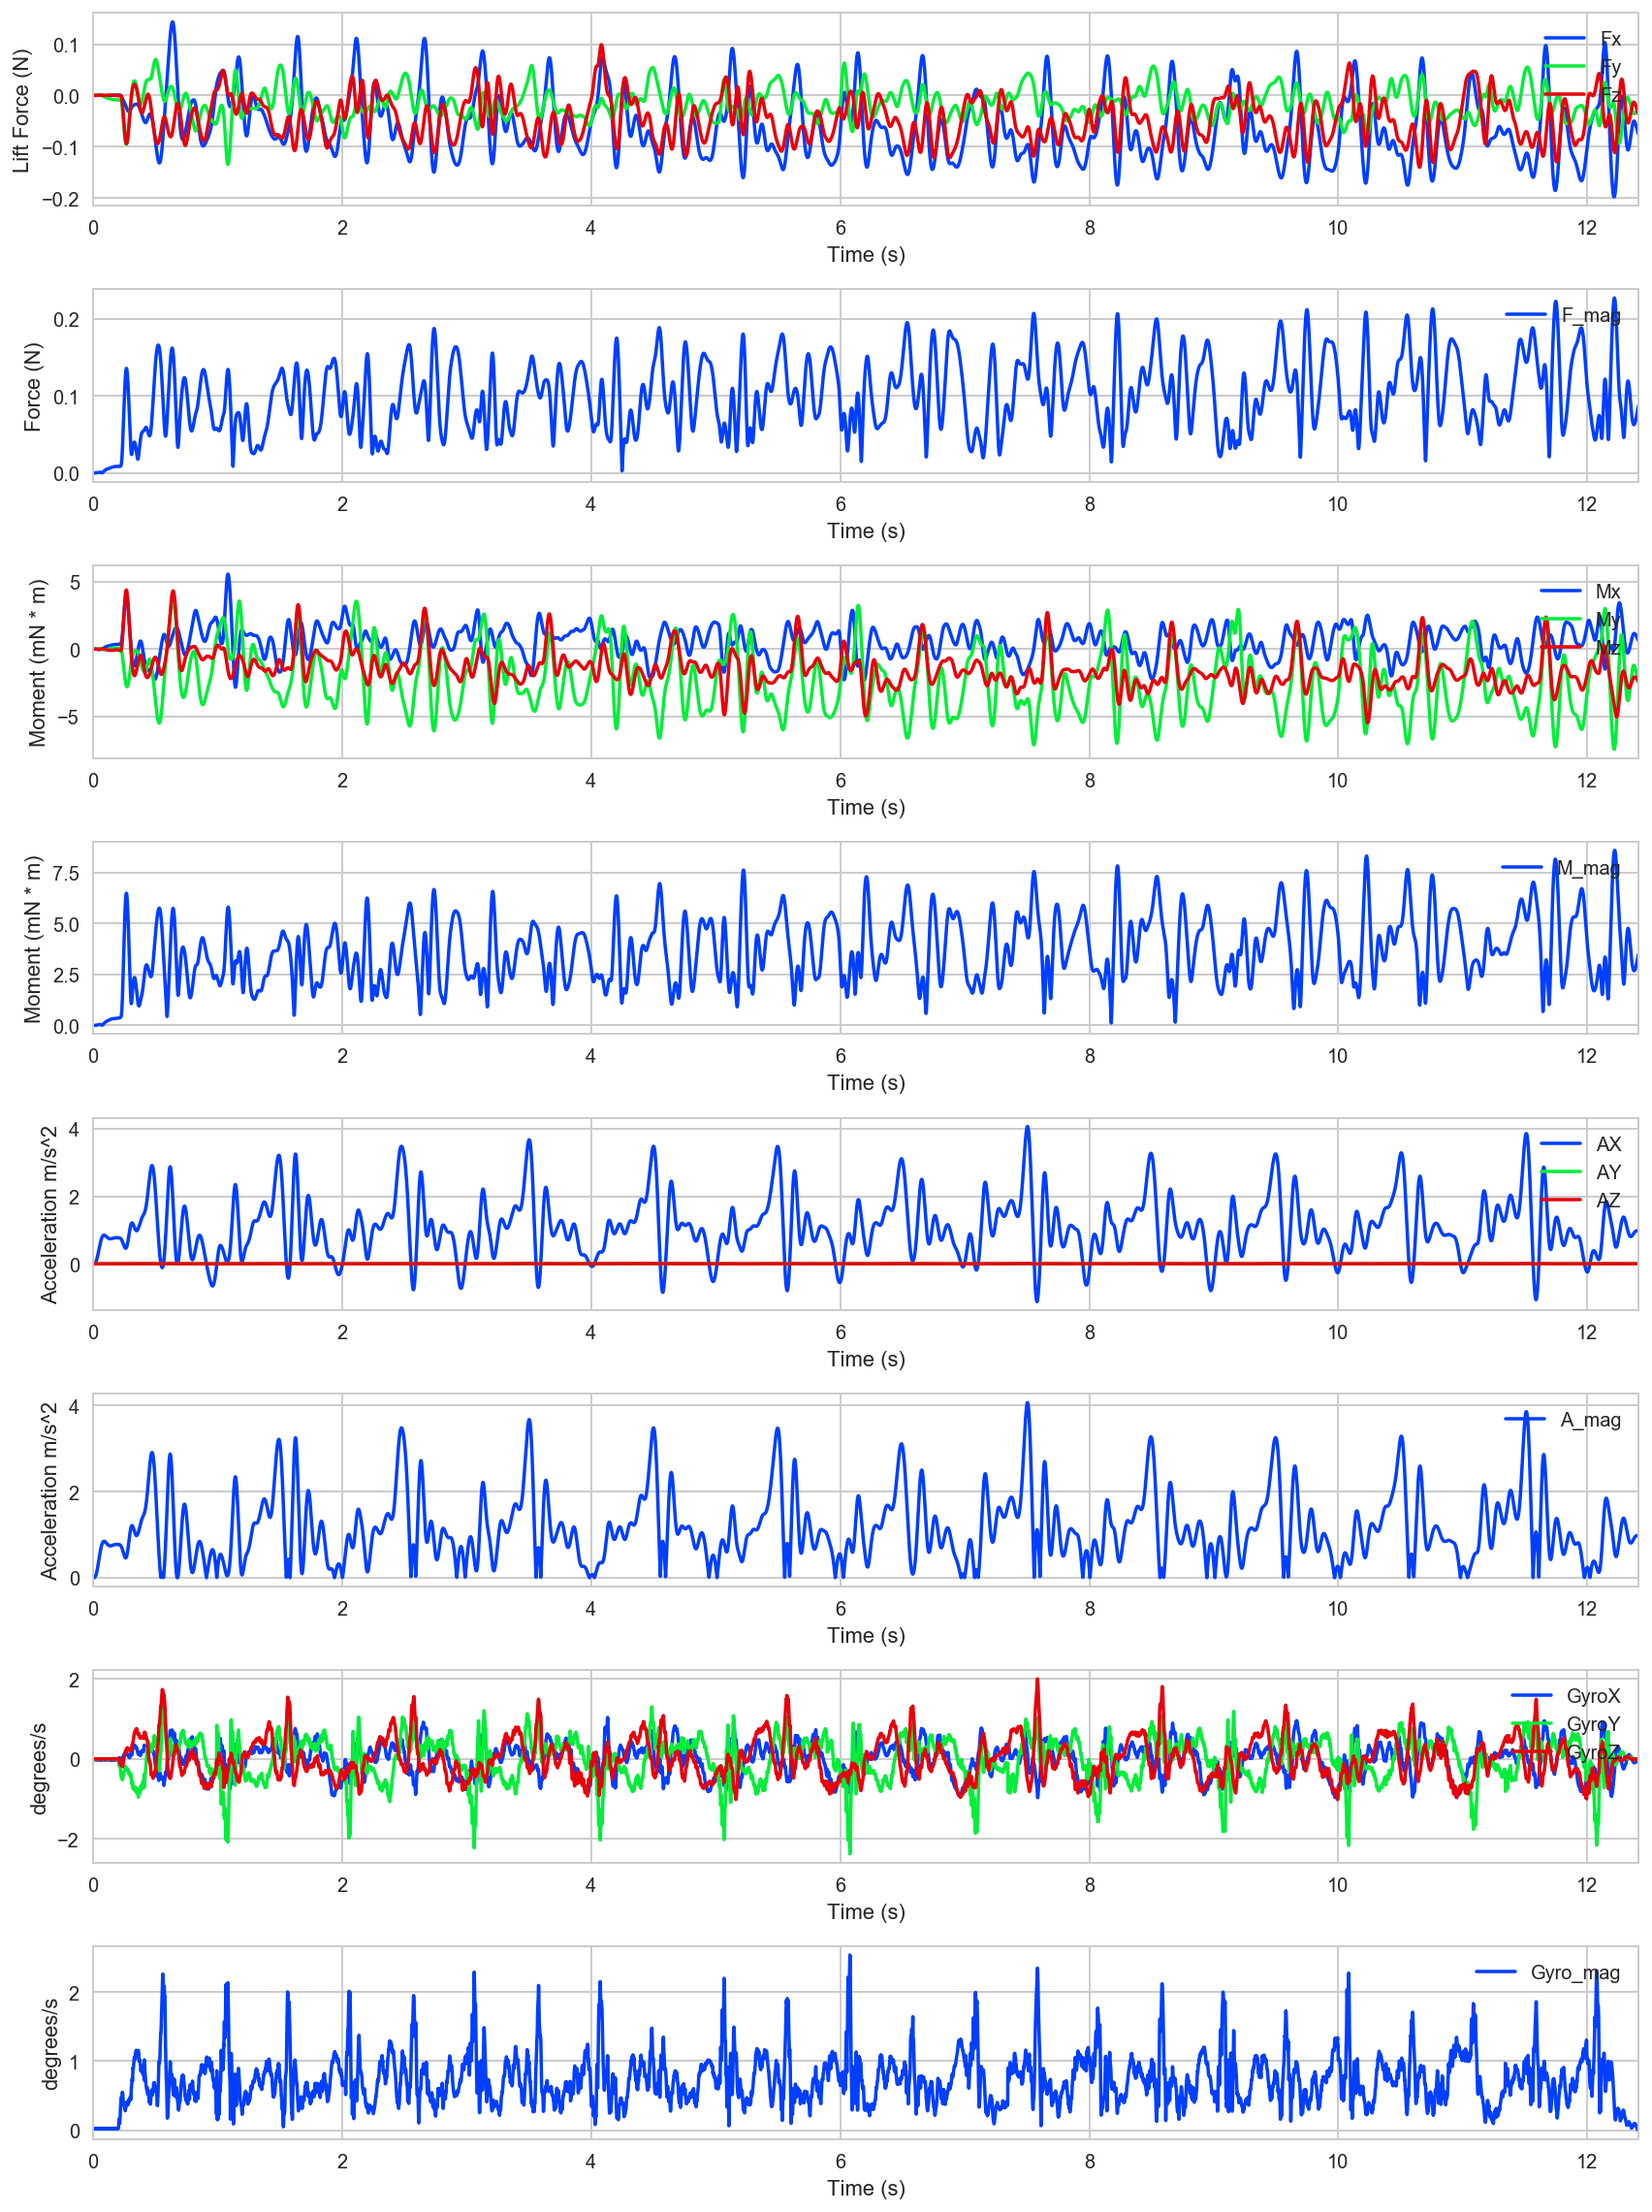

In [5]:
utils.plot_columns(df, [['Fx', 'Fy', 'Fz'], 'F_mag', ['Mx', 'My', 'Mz'], 'M_mag', ['AX', 'AY', 'AZ'], 'A_mag', ['GyroX', 'GyroY', 'GyroZ'], 'Gyro_mag'], display=True, save_figure=False)

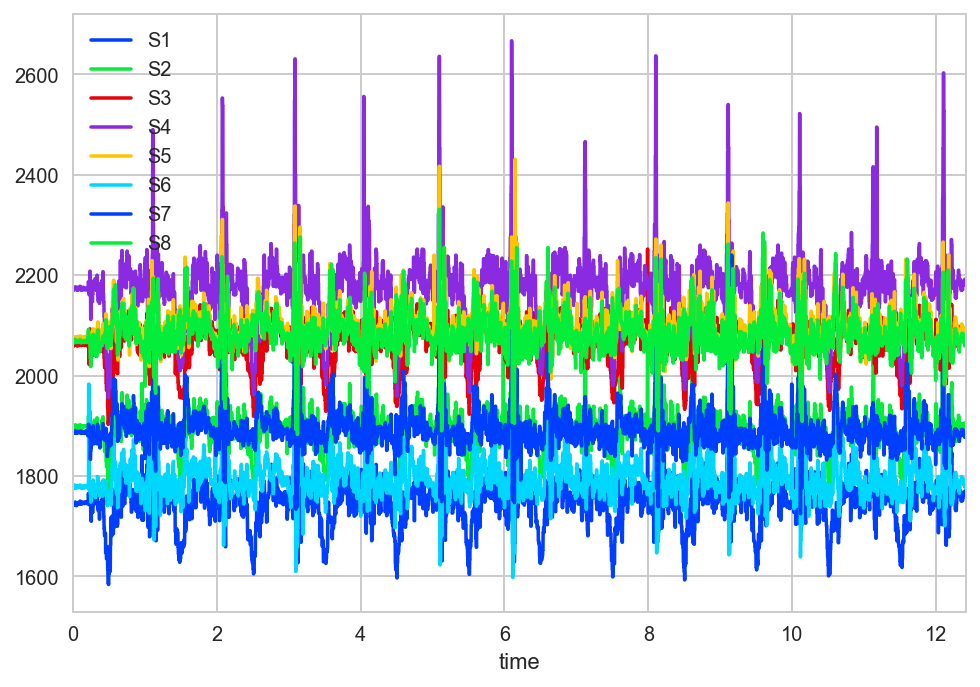

In [6]:
df.plot(x='time', y=['S1', 'S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8'])

In [7]:
drag = utils.calculate_drag_energy(df, has_bottom_shell=False,start_time=4000,end_time=8000)
print drag

drag energy (kg*cm^2/s^2): -171.017898361
-0.0171017898361


In [8]:
electrical_energy_cont = utils.calculate_electrical_energy_cont(df, start_time=4000,end_time=8000)
electrical_energy = utils.calculate_electrical_energy(df, start_time=4000, end_time=8000)

electrical energy cont: 7.56945070049
electrical energy (Joules): 7.55752638378


In [9]:
import numpy as np
start = df['Right Leg Pos'][3500:4500].argmax()
end = df['Right Leg Pos'][6500:7000].argmax()
print start, end
print df['Right Leg Pos'][start]
print df['Right Leg Pos'][end]
starts = np.arange(start, end, step=1000)
ends = np.arange(start+1000, end+1000, step=1000)
intervals = np.vstack((starts, ends)).T
print intervals

3903 6907
6.27781830958
6.27858544884
[[3903 4903]
 [4903 5903]
 [5903 6903]
 [6903 7903]]


In [10]:
drags=utils.get_drag_energy_from_list(df, False, intervals)

drag energy (kg*cm^2/s^2): -34.8542648383
drag energy (kg*cm^2/s^2): -41.2013979305
drag energy (kg*cm^2/s^2): -45.425685207
drag energy (kg*cm^2/s^2): -47.7522733882
